# Friction Socks
## PH 211 Lab
### Feb 21, 2021
### Zachary Bochanski

This notebook documents the process of determine the velocity and friction of and object on the earths surface using kinematics. The velocity will be slow enough that air drag is neglected. The lab takes a look at the objects motion in two dimentions. After velocity is found, the second part of this notebook explores how to determine the friction force acting on the object. In this case the object subject to these tests is a pair of knitted socks. 

### Dependencies

The following packages are used in assiting with calculations and visualizing the data in this lab.
- `numpy`
- `matplotlib.pyplot`
- `numpy.polynomial`
- `scipy.optimize`, specifically `fsolve`

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply
from scipy.optimize import fsolve

### Materials

- Knitted wool socks
- Scale
- Tape measure

### Concept of Operations/ Procedure

1. Collect and convert/transform data etc
2. Conduct stats analysis, variability
3. Model parameters
4. Implement model
5. Plot model
6. Determine initial velocity
7. Determine acceleration due to friction

### Data Collection

The procedure for this lab is a fairly straightforward process:

1. Gather materials.
2. Roll socks.
3. Slide socks off the table.
4. Use tape measure to find how far away from the counter they impacted.
5. Repeat until you are satisfied.

One list of data to record, the distance the object traveled after leaving the counter.

1. `sock_range = []` in meters

| Range (m): |  |
| ------| ------|
|1.28 m |1.24 m |
|1.28 m |1.27 m |
|1.27 m |1.24 m |
|1.19 m |1.22 m |
|1.24 m |1.30 m |
|1.22 m |1.27 m |
|1.27 m |1.24 m |
|1.22 m |1.22 m |
|1.19 m |1.24 m |
|1.35 m |1.17 m |
|1.24 m |

### Record Data

Breaking out the 25 foot tape measure, record the impact location from the counter edge for each launch of the sock. 

Each range is stored in list: 

- `projectile_range_raw` in

Loop though and convert each measuremnt to meters, store in list:

- `sock_range` m

Constants:

- `COUNTER_HEIGHT` m
- `GRAVITY` m/s/s
- `SOCK_MASS` kg
- `START_POS` m (starting position x axis)

In [55]:
# list for projectile range
projectile_range_raw = [50.5, 50.5, 50, 47, 49, 48, 50, 48, 47, 53, 49, 50, 49, 48, 51, 50, 49, 48, 49, 46, 49 ] # inches

# convert inches to meters
sock_range = []
for num in range(len(projectile_range_raw)):
    num = projectile_range_raw[num]/39.37
    sock_range.append(num)

# constansts
COUNTER_HEIGHT = .91 # meters
GRAVITY = 9.81 # m/s/s
SOCK_MASS = .84 # kg
START_POS = 0 # meters

print("Range in meters of sock ball:")
print("-----------------------------------")
print(sock_range)
print("-----------------------------------")
print("Counter height", COUNTER_HEIGHT, "m")
print("Earth gravity", GRAVITY, "m/s/s")
print("Mass of socks", SOCK_MASS, "kg")
print("Start position", START_POS, "m")

Range in meters of sock ball:
-----------------------------------
[1.282702565405131, 1.282702565405131, 1.27000254000508, 1.1938023876047752, 1.2446024892049785, 1.219202438404877, 1.27000254000508, 1.219202438404877, 1.1938023876047752, 1.346202692405385, 1.2446024892049785, 1.27000254000508, 1.2446024892049785, 1.219202438404877, 1.2954025908051816, 1.27000254000508, 1.2446024892049785, 1.219202438404877, 1.2446024892049785, 1.1684023368046736, 1.2446024892049785]
-----------------------------------
Counter height 0.91 m
Earth gravity 9.81 m/s/s
Mass of socks 0.84 kg
Start position 0 m


### Data Characteristics

Calculate:

- `range_mean`
- `range_median`
- `range_std`
- `range_min`
- `range_max`

Calculate:

- `variation`

It looks like the variability is around 3%, so a relativley narrow amount which is important becuase it represents pretty decent consistency in "slide", it'll help with a more accurate velocity calculation.

In [50]:
# Calculate data characteristics
range_mean = np.mean(sock_range)
range_median = np.median(sock_range)
range_std = np.std(sock_range)
range_min = np.min(sock_range)
range_max = np.max(sock_range)

# Calculate variation
range_variation = 100.*range_std/range_mean

# Display
print("--------------------------")
print("w Mean", range_mean)
print("Range Median", range_median)
print("Range Std Dev", range_std)
print("Range Min", range_min)
print("Range Max", range_max)
print("--------------------------")
print("Variability is %.2f%%" % range_variation)

--------------------------
Range Mean 1.2470215416621313
Range Median 1.2446024892049785
Range Std Dev 0.03892156926280366
Range Min 1.1684023368046736
Range Max 1.346202692405385
--------------------------
Variability is 3.12%


### FBD - Situation

![FBD_lab6](https://github.com/ztbochanski/physics-211/raw/main/images/Lab6FBD.jpg)

### Model Parameters

Two important parameters:

- initial velocity: This is what is unknown and the model is used to find
- launch angle: $0^{\circ}$
These launch measurments use a horizontal surface that the sock launches from, so the angle is $0^{\circ}$

In [78]:
# y initial
initial_y = COUNTER_HEIGHT

# x initial
initial_x = START_POS

# acceleration
accel_y = - GRAVITY # gravity in the -y direction

# option to change launch angle
launch_angle_deg = 0.
angle_rad = launch_angle_deg*np.pi/180. # convert to radians to keep numpy happy

# initial conditions
initialvelocity = 2.9 # in m/s

# x and y components of the initial velocity
vel_initial_y = initialvelocity*np.sin(anglerad)
vel_initial_x = initialvelocity*np.cos(anglerad)

### Model Implementation

The way to implement this model is create a bunch of points over time to figure out the x,y positio of the object.

In [79]:
# generate x values for model of data
maxtime = .5
numpoints = 200
modeltime = np.linspace(0.,maxtime,numpoints)

# generate x and y values for each time
modely = initial_y**1.1 + vel_initial_y*modeltime + 0.5*accel_y*modeltime**2
modelx = initial_x + vel_initial_x*modeltime


### Plot Model

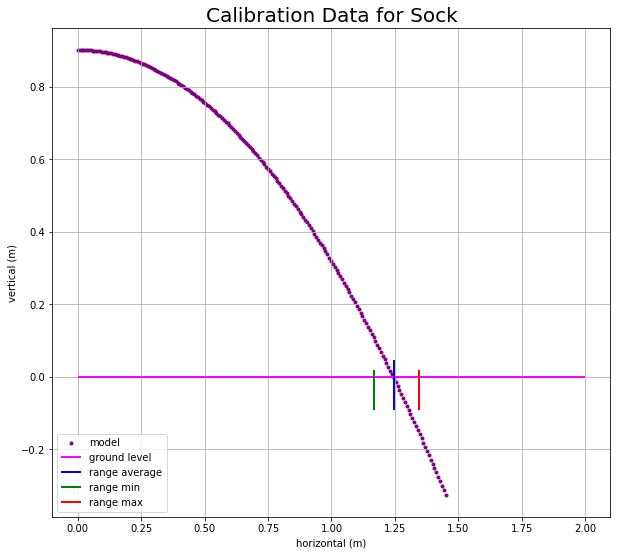

In [80]:
fig2, ax2 = plt.subplots()

# plot the basic projectile model
ax2.scatter(modelx, modely,
            marker = '.', color = 'purple',
            label = "model")

# plot the model for my possible higher speed and angle
#ax2.scatter(highx, highy,
#            marker = '.', color = 'red',
#            label = "data")

# draw a horizontal line across the plot to show the ground
ax2.hlines(0, 0, 2,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "ground level")

# vertical line to show average range
ax2.vlines(range_mean, 0.05*initial_y ,-0.1*initial_y,
         color = 'blue', linestyle = '-',
         linewidth = 2., label = "range average")

# minimum and max range observed
ax2.vlines(range_min, 0.02*initial_y ,-0.1*initial_y,
         color = 'green', linestyle = '-',
         linewidth = 2., label = "range min")

ax2.vlines(range_max, 0.02*initial_y, -0.1*initial_y,
         color = 'red', linestyle = '-',
         linewidth = 2., label = "range max")

# a more explicit way to set labels
plt.xlabel('horizontal (m)', fontsize = 10)
plt.ylabel('vertical (m)', fontsize = 10)
plt.title('Calibration Data for Sock', fontsize = 20)

fig2.set_size_inches(10, 9)
ax2.grid()

plt.legend(loc= 3)
plt.show()

### Initial Velocities

The initial velocity that gives the average distance (m):

- `2.9 m/s`

Minimum range velocity:

- 2.7 m/s

Max range velocity:

- 3.1 m/s


### Time sock projectile hits ground

So far we have x, y as position coordinates. How do we know when the object hits the ground?

A ground strike is represented by height (y) = 0

We can use python to find negative y values:

`np.where` to find an array of *all* or *remainder* of the points below zero. According to the code below the 171th is the lowest point that is below zero (below ground), so the point right before it would be the closest to zero or ground level.

That point plugged into the modeltime will give an approximate range of the time of flight (time it took for the sock projectile to reach 0).

In [88]:
# extract the elements of the model that are 'below' the ground

below_ground_elements = np.where(modely < 0.)
just_after_contact = np.min(below_ground_elements)

print("min point below the ground:", just_after_contact)

print("The projectile lands between %.4f and %.4f (s)" % 
      (modeltime[just_after_contact-1],
       modeltime[just_after_contact]))

print("It's range is %.4f and %.4f (m) at those times" % 
      (modelx[just_after_contact-1],
       modelx[just_after_contact]))

print("It's height is %.4f and %.4f (m) at those times" % 
      (modely[just_after_contact-1],
       modely[just_after_contact]))


min point below the ground: 171
The projectile lands between 0.4271 and 0.4296 (s)
It's range is 1.2387 and 1.2460 (m) at those times
It's height is 0.0066 and -0.0040 (m) at those times


### Launch Friction

1. Average the distance it takes the sock ball to come to rest on the launch surface.

2. Apply as best as possible the same amount of force as if conducting a launch.

3. Apply a force to the object so I will not launch, and stop on the table (shooting for consitency).

4. Record data into `stop_distance = []` (m) list.

#### Data
| Stopping Distance (m): |
|:------:|
|1.4 m |
|1.6 m |
|1.2 m |
|1.3 m |
|1.4 m |

5. Calculate mean

In [92]:
# stopping distance
stop_distance = [1.4, 1.6, 1.2, 1.3, 1.4]

# average
stop_distance_mean = np.mean(stop_distance)
print("average", stop_distance_mean, "meters to stop")

average 1.3800000000000001 meters to stop
